# Exploring how businesses have responded to COVID, via Yelp Data

### Pre-processing Data

In [67]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
#Import data and analyze
data = r'/Users/OliverPan/Desktop/yelp_covid/yelp_covid.json'

In [69]:
yelp_df = pd.read_json(data, lines = True)

### Basic EDA

In [70]:
#Shape of df
yelp_df.shape

(209795, 9)

In [71]:
#Check to ensure that entries are unique
yelp_df["business_id"].nunique()

209393

#### It seems that there are duplicates, which we can explore later

In [72]:
#Columns in df
yelp_df.columns.values

array(['business_id', 'highlights', 'delivery or takeout',
       'Grubhub enabled', 'Call To Action enabled',
       'Request a Quote Enabled', 'Covid Banner',
       'Temporary Closed Until', 'Virtual Services Offered'], dtype=object)

In [73]:
#View the dataframe
yelp_df.head()

,business_id,highlights,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Covid Banner,Temporary Closed Until,Virtual Services Offered
0,9kXRUIkwdDtnAPO6tVo51g,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,H6D5HOTfMjrZt7r1EObZ1g,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FYddq7fUtzobZcw4jOJgVA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,c75jLTjlgA9q3gImLEGT6w,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,YfzPiY50h_10Sjlg3mnNWQ,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


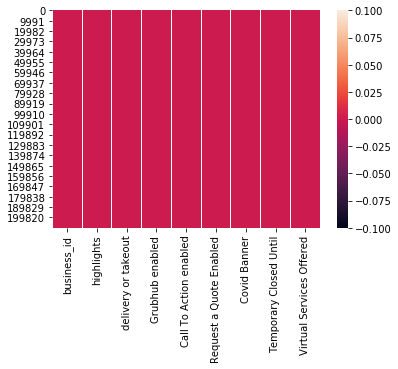

In [74]:
#Check to see if any data is NA
sns.heatmap(yelp_df.isnull())

#### We can see that none of the columns are NA, which is great!

In [75]:
#Lastly, we can rename the columns
yelp_df.columns = ["id", "highlights", "d/t", "grub", "cta", "raq", "covid_banner", "closed_until", "services"]

### Analysis of T/F variables

In [76]:
#Start with delivery or takeout columns
yelp_df["d/t"].value_counts()

FALSE    143564
TRUE      66231
Name: d/t, dtype: int64

In [77]:
#Highlights
yelp_df["grub"].value_counts()

FALSE    191802
TRUE      17993
Name: grub, dtype: int64

In [78]:
#Call to action
yelp_df["cta"].value_counts()

FALSE    155728
TRUE      54067
Name: cta, dtype: int64

In [79]:
#Request a Quote
yelp_df["raq"].value_counts()

FALSE    207347
TRUE       2448
Name: raq, dtype: int64

#### We can plot the ratio of False to True for these columns, using a stacked bar chart

### Engineer new features

In [80]:
#If there is no closed until date, we can temporariy assume the business is open
yelp_df["closed"] = yelp_df["closed_until"].apply(lambda x: False if x == 'FALSE' else True)

In [81]:
#Check if close date
yelp_df["closed"].value_counts()

False    208414
True       1381
Name: closed, dtype: int64

In [82]:
#See if virtual service was offered during COVID
yelp_df["virtual_offered"] = yelp_df["services"].apply(lambda x: True if x != 'FALSE' else False)

In [83]:
#Services Offered
yelp_df["virtual_offered"].value_counts()

False    205573
True       4222
Name: virtual_offered, dtype: int64

### Visualize Data

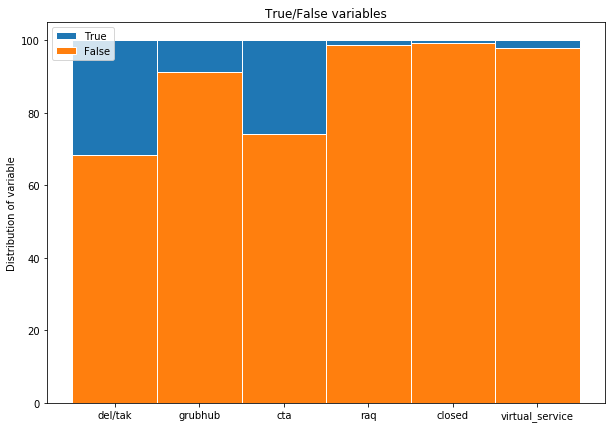

In [84]:
#Percentage Stacked Bar Chart
columns = np.array(["del/tak", "grubhub", "cta", "raq", "closed", "virtual_service"])
true = np.array([66231, 17993, 54067, 2448, 1381, 4222])
false = np.array([143564, 191802, 155728, 207347, 208414, 205573])
total = true + false
proportion_true = np.true_divide(true, total) * 100
proportion_false = np.true_divide(false, total) * 100
    
r = range(len(columns))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.bar(r, proportion_true, bottom=proportion_false, edgecolor='white', width=barWidth, label="True")
ax2 = plt.bar(r, proportion_false, edgecolor='white', width=barWidth, label='False')
plt.legend()
plt.xticks(r, columns)
plt.title("True/False variables")
plt.ylabel("Distribution of variable")
plt.show()

### Cluster businesses

#### For now, we can ignore some columns that require more analysis, so let us just cluster clinics with True/False Values

In [98]:
#Import cluster library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [85]:
#Create cluster_df
cluster_df = yelp_df[["id", "d/t", "grub", "cta", "raq", "closed", "virtual_offered"]]

In [86]:
cluster_df.head()

,id,d/t,grub,cta,raq,closed,virtual_offered
0,9kXRUIkwdDtnAPO6tVo51g,FALSE,FALSE,FALSE,FALSE,False,False
1,H6D5HOTfMjrZt7r1EObZ1g,FALSE,FALSE,FALSE,FALSE,False,False
2,FYddq7fUtzobZcw4jOJgVA,FALSE,FALSE,FALSE,FALSE,False,False
3,c75jLTjlgA9q3gImLEGT6w,FALSE,FALSE,FALSE,FALSE,False,False
4,YfzPiY50h_10Sjlg3mnNWQ,FALSE,FALSE,FALSE,FALSE,False,False


In [89]:
#Change columns to int
cluster_df["d/t"] = cluster_df["d/t"].apply(lambda x: False if x == 'FALSE' else True).astype(int)
cluster_df["grub"] = cluster_df["grub"].apply(lambda x: False if x == 'FALSE' else True).astype(int)
cluster_df["cta"] = cluster_df["cta"].apply(lambda x: False if x == 'FALSE' else True).astype(int)
cluster_df["raq"] = cluster_df["raq"].apply(lambda x: False if x == 'FALSE' else True).astype(int)
cluster_df["closed"] = cluster_df["closed"].astype(int)
cluster_df["virtual_offered"] = cluster_df["virtual_offered"].astype(int)

/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [90]:
cluster_df.head()

,id,d/t,grub,cta,raq,closed,virtual_offered
0,9kXRUIkwdDtnAPO6tVo51g,0,0,0,0,0,0
1,H6D5HOTfMjrZt7r1EObZ1g,0,0,0,0,0,0
2,FYddq7fUtzobZcw4jOJgVA,0,0,0,0,0,0
3,c75jLTjlgA9q3gImLEGT6w,0,0,0,0,0,0
4,YfzPiY50h_10Sjlg3mnNWQ,0,0,0,0,0,0


In [94]:
#Drop ID columns
cluster_df = cluster_df.drop(["id"], axis = 1)

Text(0.5, 1.0, 'Elbow method on cluster_df')

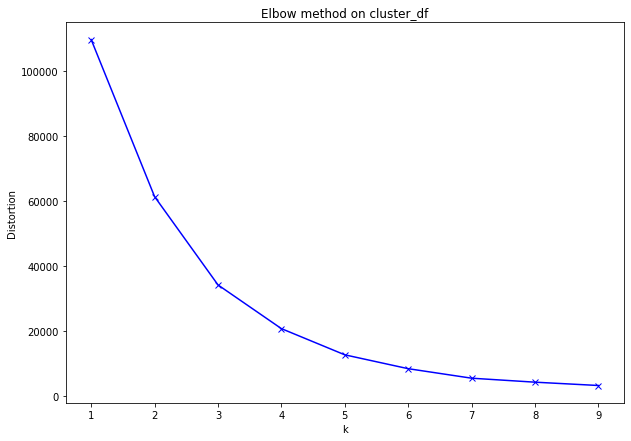

In [97]:
#Elbow method to determine number of clusters
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method on cluster_df')